<a href="https://colab.research.google.com/github/DaudRaza-NUST/DL-Assignment1/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center>Assignment#1</center>
##<center>Daud Raza</center>
##<center>40192</center>

#SVM Classifier


In [92]:
#Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import os
import cv2

image_folder = '/content/drive/MyDrive/ColabNotebooks/Assignment#1'
images = []

for filename in os.listdir(image_folder):
    img = cv2.imread(os.path.join(image_folder, filename))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    if img is not None:
        images.append(img)

In [95]:
class SVM:

    def __init__(self, learning_rate=0.001, reg_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.reg_param = reg_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self,X,y):
        n_samples, n_features = np.shape(X)

        y_ = np.where(y <= 0, -1, 1)

        #init weights
        self.w = np.random.rand(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w)-self.b) >=1
                if condition:
                    self.w -= self.lr * (2 * self.reg_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.reg_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [96]:
print(len(images))
print(images[0].ndim)

20
3


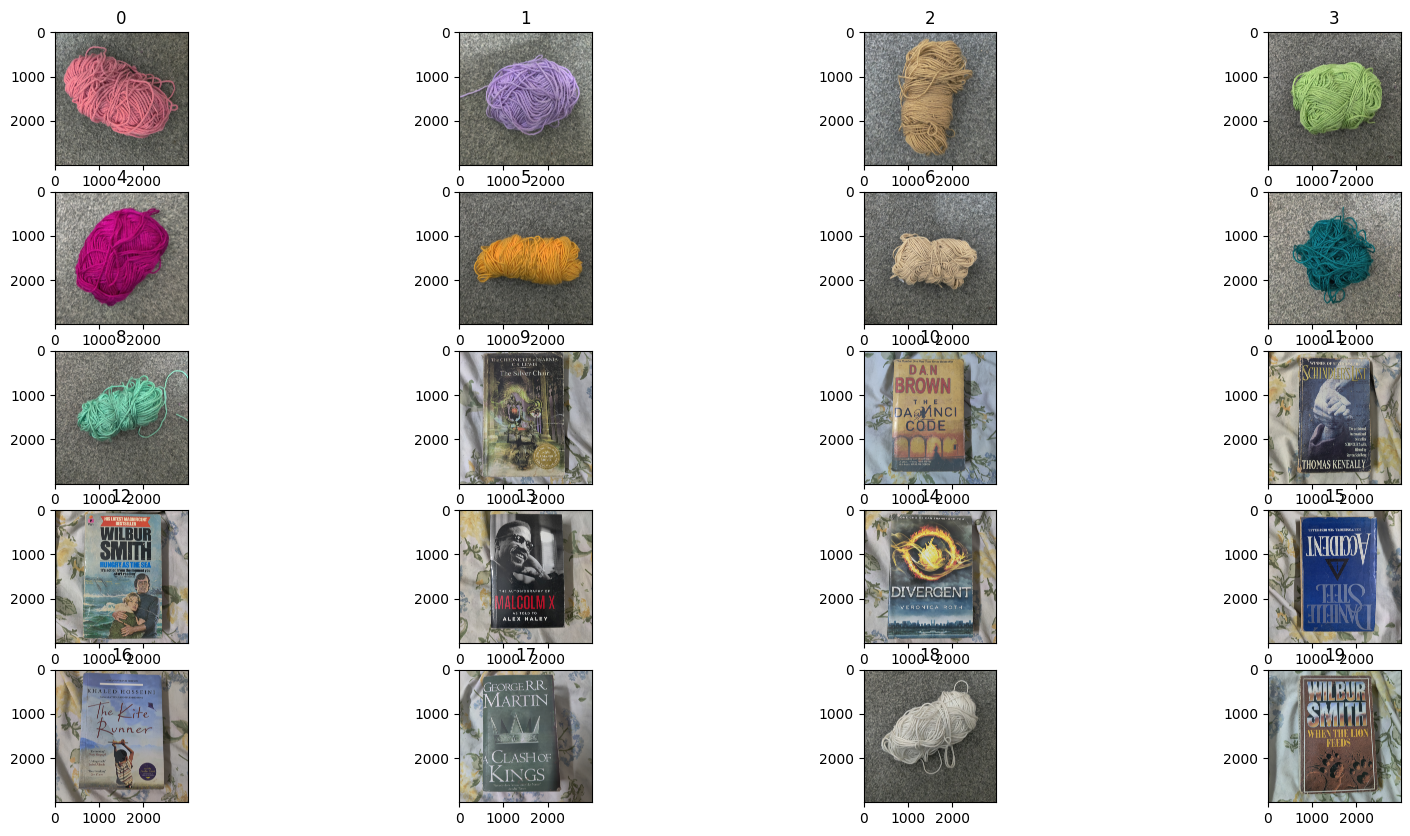

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
columns = 4
for i, image in enumerate(images):
    plt.subplot(5,columns, i + 1)
    plt.title(i)
    plt.imshow(image)

In [98]:
labels = np.array([-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,-1,1])
print(len(labels))

20


In [99]:
def image_to_feature_vector(image, size=(32, 32)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [100]:
features = []
for i in images:
  features.append(image_to_feature_vector(i))


In [101]:
print(features[0])
print(np.shape(features))

[109 114 109 ...  94  92  88]
(20, 3072)


In [102]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=0, train_size=0.6)

In [103]:
print(X_train[1])
print(y_train)

[146 149 153 ...  88  89  84]
[-1 -1 -1  1  1 -1  1  1 -1 -1  1  1]


In [104]:
clf = SVM()

In [105]:
clf.fit(X_train, y_train)

In [106]:
predictions = clf.predict(X_test)
print(predictions)

[ 1.  1. -1.  1. -1.  1. -1.  1.]


In [107]:
print(y_test)

[-1 -1  1 -1  1  1 -1  1]


In [108]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)*100
  return accuracy

print("SVM Classification Accuracy", accuracy(y_test, predictions))

SVM Classification Accuracy 37.5


#KNN Classifier

In [109]:
from statistics import mode

def euclidean_distance(x1, x2):
  distance = np.sqrt(np.sum((x1-x2)**2))
  return distance

class KNN:
  def __init__(self, k=1):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    # compute the distance
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

    # get the closest K
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    print(k_nearest_labels)

    # majority vote
    Assign_label = mode(k_nearest_labels)
    return Assign_label

### We fit and train the data on the KNN classifier with K = 1, 3, 5. K = 1 % 5 yield an accuracy of 87.5%, while k=3 yields an accuracy of 75%. The train test split used was 60/40

In [110]:
KNN_clf = KNN()
KNN_clf.fit(X_train, y_train)

In [111]:
y_pred = KNN_clf.predict(X_test)
print(y_pred)

[-1]
[-1]
[1]
[-1]
[-1]
[1]
[-1]
[1]
[-1, -1, 1, -1, -1, 1, -1, 1]


In [112]:
accuracy = np.sum(y_pred == y_test) / len(y_test) * 100
print("KNN Classifier with k = 1 accuracy:", accuracy)

KNN Classifier with k = 1 accuracy: 87.5


In [113]:
KNN_clf_3 = KNN(k=3)
KNN_clf_3.fit(X_train, y_train)

In [114]:
y_pred_3 = KNN_clf_3.predict(X_test)
print(y_pred_3)

[-1, -1, -1]
[-1, -1, -1]
[1, 1, 1]
[-1, -1, -1]
[-1, 1, -1]
[1, -1, -1]
[-1, -1, -1]
[1, 1, 1]
[-1, -1, 1, -1, -1, -1, -1, 1]


In [115]:
accuracy = np.sum(y_pred_3 == y_test) / len(y_test) * 100
print("KNN Classifier with k = 3 accuracy:", accuracy)

KNN Classifier with k = 3 accuracy: 75.0


In [116]:
KNN_clf_5 = KNN(k=5)
KNN_clf_5.fit(X_train, y_train)

In [117]:
y_pred_5 = KNN_clf_5.predict(X_test)
print(y_pred_5)

[-1, -1, -1, 1, 1]
[-1, -1, -1, -1, -1]
[1, 1, 1, 1, -1]
[-1, -1, -1, -1, -1]
[-1, 1, -1, 1, 1]
[1, -1, -1, -1, 1]
[-1, -1, -1, -1, -1]
[1, 1, 1, 1, 1]
[-1, -1, 1, -1, 1, -1, -1, 1]


In [118]:
accuracy = np.sum(y_pred_5 == y_test) / len(y_test) * 100
print("KNN Classifier with k = 5 accuracy:", accuracy)

KNN Classifier with k = 5 accuracy: 87.5


### Two features were created to plot the graph for KNN. Standard deviation and mean of pixel intensities of each image

In [119]:
mean_pixel_intensity = [np.mean(x) for x in X_train]
print(mean_pixel_intensity)

[112.86555989583333, 119.42805989583333, 96.35872395833333, 122.951171875, 118.36653645833333, 114.61100260416667, 131.32063802083334, 124.28157552083333, 107.33203125, 108.27604166666667, 117.76432291666667, 128.34342447916666]


In [120]:
std = [np.std(x) for x in X_train]
print(std)

[45.94804823706761, 30.71394450606129, 36.819541126803635, 47.53350886240719, 48.21928426452477, 43.003800659130135, 35.660450068277264, 49.48660723827442, 35.106466270461105, 37.98193751034734, 55.14488306440945, 48.21252419563416]


## We plot the training data on the basis of the mean pixel intensity and the standard deviation of pixel intensity for each image

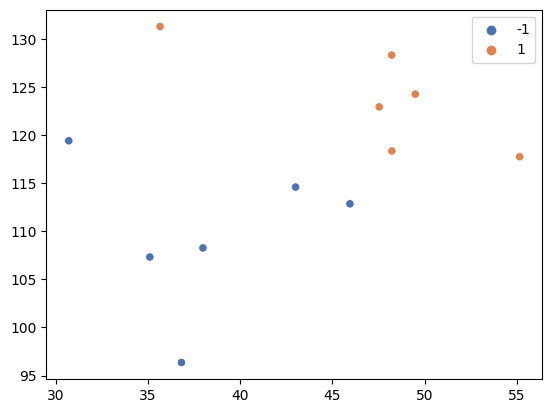

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=std,y=mean_pixel_intensity, hue=y_train, palette="deep")
plt.show()

In [122]:
test_mean_pixel_intensity = [np.mean(x) for x in X_test]
test_std = [np.std(x) for x in X_test]
print(test_mean_pixel_intensity)
print(test_std)

[103.96028645833333, 121.578125, 121.27701822916667, 113.36393229166667, 135.9990234375, 119.64127604166667, 110.5009765625, 116.3095703125]
[40.224205450009926, 34.28271347719394, 49.0570035983298, 31.121920466054398, 39.41563295752282, 41.105969690606386, 35.33770301327831, 57.692077843575014]


### The plot below shows how the KNN classifier with K=1 has classified our test data.

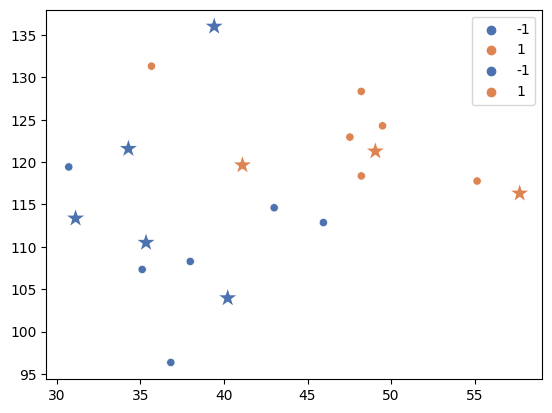

In [123]:
sns.scatterplot(x=std,y=mean_pixel_intensity, hue=y_train, palette="deep")
sns.scatterplot(x=test_std,y=test_mean_pixel_intensity, hue=y_pred, marker = "*", s=300, palette="deep")
plt.show()

In [124]:
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/Assignment#1.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/Assignment#1.ipynb to html
[NbConvertApp] Writing 717116 bytes to /content/drive/MyDrive/ColabNotebooks/Assignment#1.html
